<a href="https://colab.research.google.com/github/Waga43/ETTM-ArewaDS-Deep-Learning/blob/main/Part_1_Deep_Learning_with_Pytorch/exercise_submissions/week_5_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arewa Data Science Academy Deep Learning Cohort 2.0

**Name:** Abubakar Sadiq Suleiman

**Email:** engrdanalupalladan@gmail.com

**Title:** Week 5 Solution

In [1]:
# Check for GPU
!nvidia-smi

Sun Apr 27 12:10:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.6.0+cu124


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

Underfitting occurs when a model has not learned the patterns in the training data well and is unable to generalize well on the new data.

An underfit model has poor performance on the training data and will result in unreliable predictions. Underfitting occurs due to high bias and low variance.

### Reasons for Underfitting
- If data used for training is not cleaned and contains noise (garbage values) in it.

- Model has a high bias and low variance.

- Size of the training dataset used is not enough.

- Model is too simple.

### Some of the Ways to Tackle Underfitting Include:
- **Increase the number of features in the dataset:** increasing the number of features will help the model to learn better and thus prevent underfitting.

- **Increase model complexity:** when a model is overly simple, it fails to learn the underlying patterns in the data and will thus perform poorly on new data.

- **Reduce noise in the data**: when there are too much data that daon't add value to the model's learning of the underlying patterns in the data, underfitting occurs.

- **Increase the duration of training the data**: shorter duration of training does not afford the model adequate time to learn the underlying patterns in the data

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [3]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data (images from GitHub)
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
  print(f"Unzipping pizza, steak, suhsi data to {image_path}")
  zip_ref.extractall(image_path)


Did not find data/pizza_steak_sushi directory, creating...
Unzipping pizza, steak, suhsi data to data/pizza_steak_sushi


In [4]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(data_path)

There are 1 directories and 1 images in 'data'.
There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [7]:
# Setup train and testing paths
print(f"Image Path:\t{image_path}")
train_dir = image_path / "train"
test_dir = image_path / "test"
print(f"Train Directory:\t{train_dir}\n"
      f"Test Directory:\t{test_dir}")

Image Path:	data/pizza_steak_sushi
Train Directory:	data/pizza_steak_sushi/train
Test Directory:	data/pizza_steak_sushi/test


data/pizza_steak_sushi
[PosixPath('data/pizza_steak_sushi/train/pizza/3860002.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/12301.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2885796.jpg')]
data/pizza_steak_sushi/train/sushi/3353428.jpg
sushi
Random image path: data/pizza_steak_sushi/train/sushi/3353428.jpg
Image class: sushi
Image height: 512
Image width: 512


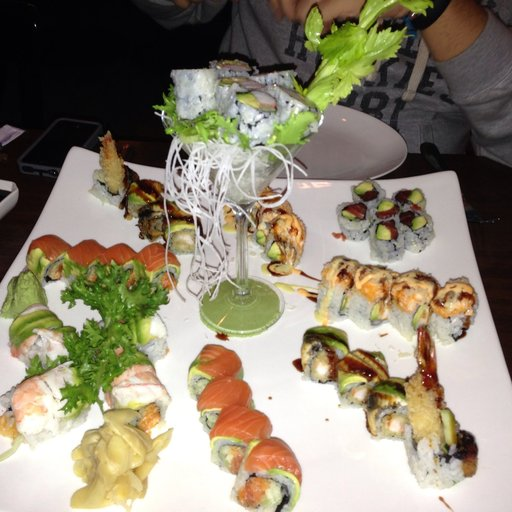

In [8]:
# Visualize an image
import random
from PIL import Image

# Set seed for reproducibility
# random.seed(443)

# Check the format of the image direcory
print(image_path)
list_image_path = list(image_path.glob("*/*/*.jpg"))
print(list_image_path[:3])


random_image_path = random.choice(list_image_path)
print(random_image_path)

# Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# Open image
img = Image.open(random_image_path)

# Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [9]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

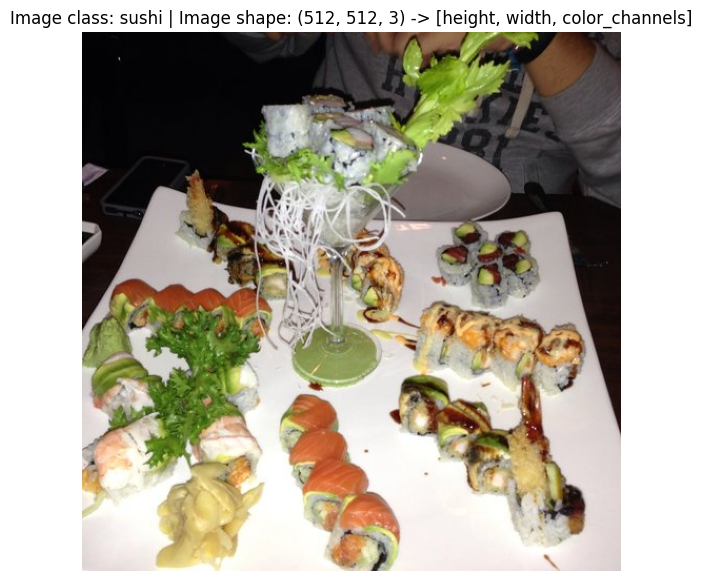

In [10]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [11]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [19]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])


In [18]:
# # Check the type of img
# print(f"Original image is of class form: {type(img)}\n")

# # Write transform for turning images into tensors
# data_transform = transforms.Compose([
#   # First print out the original size of the image
#   # f"Original Image shape: {img_as_array.shape}\n",
#   # Resize the images to 64x64x3 (given in the form of H, W, C)
#   transforms.Resize(size=(64, 64)),
#   # Check the size of the new image
#   # f"New transformed Image shape: {transforms.Resize(size=(64, 64))}",
#   # Flip the images randomly on horizontal
#   transforms.RandomHorizontalFlip(p=0.5),
#   # Turn the image into a torch.Tensor
#   transforms.ToTensor() # converts all pixel values from 0-255 to be between 0-1
# ])

# # Check the type of the tarsnformed image
# f"\nNew transformed Image is of class form: {type(data_transform)}"

Original image is of class form: <class 'PIL.JpegImagePlugin.JpegImageFile'>



"\nNew transformed Image is of class form: <class 'torchvision.transforms.transforms.Compose'>"

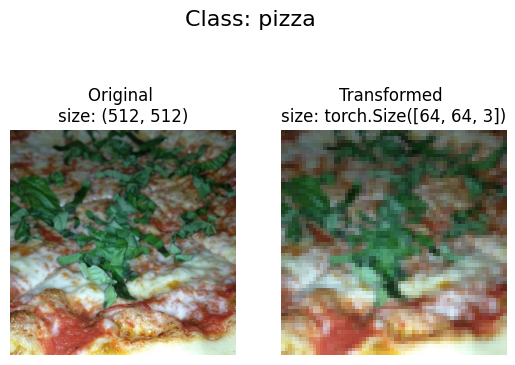

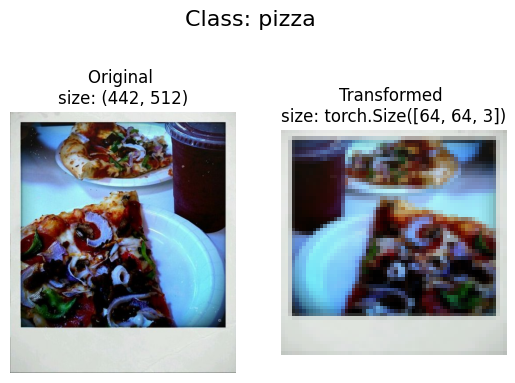

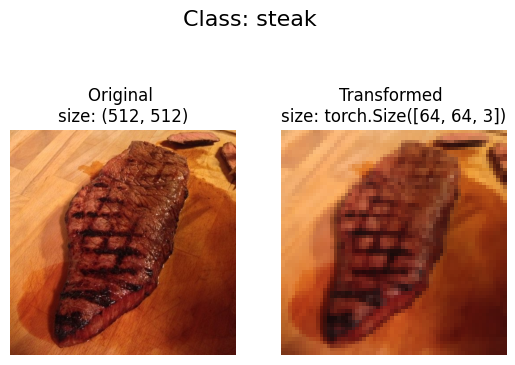

In [20]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=443):
  """Plots a series of random images from image_paths."""
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  # Loop through the image paths, and plot each image at each iteration
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nsize: {f.size}")
      ax[0].axis("off")

      # Transform and plot image
      # permute() the image to make sure it's compatible with matplotlib
      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nsize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(list_image_path,
                        transform=data_transform,
                        n=3)

### Load image data using `ImageFolder`

In [21]:
# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [22]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [23]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [24]:
# Check the lengths of each dataset
print(f"The length of the train dataset is:\t{len(train_data)}\n"
      f"The length of the test dataset is:\t{len(test_data)}")

The length of the train dataset is:	225
The length of the test dataset is:	75


In [25]:
# Turn train and test Datasets into DataLoaders
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7becb17d98d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7becb1919ed0>)

In [26]:
# How many batches of images are in our data loaders?
print(f"The batch of images in our train dataloader is:\t{len(train_dataloader)}\n"
      f"The batch of images in our test dataloader is:\t{len(test_dataloader)}")


The batch of images in our train dataloader is:	225
The batch of images in our test dataloader is:	75


## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [27]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape))

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Layer 1 shape: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Layer 2 shape: {x.shape}")
    x = self.classifier(x)
    # print(f"Layer 3 shape: {x.shape}")
    return x

In [28]:
# Create model_0
model_0 = TinyVGG(input_shape = 3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

## 4. Create training and testing functions for `model_0`.

In [29]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)
    # print(y_pred)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [30]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)
      # print(test_pred_logits)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [31]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

In [32]:
# results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [33]:
type(model_0)

__main__.TinyVGG

In [34]:
model_0.parameters()

<generator object Module.parameters at 0x7becb183dfc0>

In [37]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
learning_rate = 0.001
model_0

loss_fn=nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model_0.parameters(), lr=learning_rate)
# Now you can call the train function
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1066 | train_acc: 0.3600 | test_loss: 1.2298 | test_acc: 0.3600
Epoch: 2 | train_loss: 1.0388 | train_acc: 0.4667 | test_loss: 1.0598 | test_acc: 0.4267
Epoch: 3 | train_loss: 0.9451 | train_acc: 0.5600 | test_loss: 0.9723 | test_acc: 0.3733
Epoch: 4 | train_loss: 0.8909 | train_acc: 0.5956 | test_loss: 1.0364 | test_acc: 0.4000
Epoch: 5 | train_loss: 0.8569 | train_acc: 0.6400 | test_loss: 0.9745 | test_acc: 0.4400


In [38]:
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [40]:
# Train for 20 epochs
torch.manual_seed(443)
torch.cuda.manual_seed(443)
number_of_epochs = 20
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=learning_rate)

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=number_of_epochs)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1053 | train_acc: 0.3289 | test_loss: 1.0989 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0992 | train_acc: 0.3333 | test_loss: 1.0996 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.1102 | train_acc: 0.3467 | test_loss: 1.0996 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.0993 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1002 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1001 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.1009 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1010 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1012 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1017 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1010 | test_acc: 0.3333
Epoch: 12 | train_l

In [41]:
# Train for 50 epochs
torch.manual_seed(443)
torch.cuda.manual_seed(443)
number_of_epochs = 50
model_2 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=learning_rate)

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=number_of_epochs)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1053 | train_acc: 0.3289 | test_loss: 1.0989 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0992 | train_acc: 0.3333 | test_loss: 1.0996 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.1102 | train_acc: 0.3467 | test_loss: 1.0996 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.0993 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0986 | train_acc: 0.3511 | test_loss: 1.1002 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1002 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.1009 | train_acc: 0.3689 | test_loss: 1.1005 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1008 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1009 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0987 | train_acc: 0.3200 | test_loss: 1.1013 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0989 | train_acc: 0.3378 | test_loss: 1.1006 | test_acc: 0.3333
Epoch: 12 | train_l

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [42]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_3 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10 we used previously
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)

model_3_results = train(model=model_3,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20) # train for 20 epochs

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0998 | train_acc: 0.3867 | test_loss: 1.0507 | test_acc: 0.4267
Epoch: 2 | train_loss: 1.0001 | train_acc: 0.5200 | test_loss: 1.0134 | test_acc: 0.4533
Epoch: 3 | train_loss: 0.9544 | train_acc: 0.5778 | test_loss: 0.9830 | test_acc: 0.4800
Epoch: 4 | train_loss: 0.8744 | train_acc: 0.6178 | test_loss: 0.9835 | test_acc: 0.4933
Epoch: 5 | train_loss: 0.8617 | train_acc: 0.5911 | test_loss: 1.0588 | test_acc: 0.4533
Epoch: 6 | train_loss: 0.8328 | train_acc: 0.6267 | test_loss: 1.0217 | test_acc: 0.4800
Epoch: 7 | train_loss: 0.8348 | train_acc: 0.6267 | test_loss: 1.1035 | test_acc: 0.4800
Epoch: 8 | train_loss: 0.7414 | train_acc: 0.6622 | test_loss: 1.0881 | test_acc: 0.4667
Epoch: 9 | train_loss: 0.7278 | train_acc: 0.6756 | test_loss: 1.1763 | test_acc: 0.4267
Epoch: 10 | train_loss: 0.6877 | train_acc: 0.6800 | test_loss: 1.1414 | test_acc: 0.4133
Epoch: 11 | train_loss: 0.6610 | train_acc: 0.7511 | test_loss: 1.0607 | test_acc: 0.5333
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [43]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [44]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.


Excellent, we now have double the training and testing images...

In [45]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [46]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

train_data_20_percent = ImageFolder(train_data_20_percent_path,
                                    transform=simple_transform)

test_data_20_percent = ImageFolder(test_data_20_percent_path,
                                   transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(train_data_20_percent,
                                         batch_size=32,
                                         num_workers=os.cpu_count(),
                                         shuffle=True)

test_dataloader_20_percent = DataLoader(test_data_20_percent,
                                        batch_size=32,
                                        num_workers=os.cpu_count(),
                                        shuffle=False)

In [48]:
# Train a model with increased amount of data
torch.manual_seed(443)
torch.cuda.manual_seed(443)

model_4 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.001)

model_4_results = train(model=model_4,
                        train_dataloader=train_dataloader_20_percent, # use double the training data
                        test_dataloader=test_dataloader_20_percent, # use double the testing data
                        optimizer=optimizer,
                        epochs=20) # train for 20 epochs

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0993 | train_acc: 0.2958 | test_loss: 1.0679 | test_acc: 0.5233
Epoch: 2 | train_loss: 0.9834 | train_acc: 0.6000 | test_loss: 0.9225 | test_acc: 0.5403
Epoch: 3 | train_loss: 0.9440 | train_acc: 0.5458 | test_loss: 0.8985 | test_acc: 0.5722
Epoch: 4 | train_loss: 0.8472 | train_acc: 0.6521 | test_loss: 0.9145 | test_acc: 0.5636
Epoch: 5 | train_loss: 0.8123 | train_acc: 0.6521 | test_loss: 0.8909 | test_acc: 0.5977
Epoch: 6 | train_loss: 0.8113 | train_acc: 0.6542 | test_loss: 0.9012 | test_acc: 0.6011
Epoch: 7 | train_loss: 0.8264 | train_acc: 0.6542 | test_loss: 0.8911 | test_acc: 0.5687
Epoch: 8 | train_loss: 0.8011 | train_acc: 0.6104 | test_loss: 0.9020 | test_acc: 0.6017
Epoch: 9 | train_loss: 0.7430 | train_acc: 0.7083 | test_loss: 0.9662 | test_acc: 0.5574
Epoch: 10 | train_loss: 0.6979 | train_acc: 0.7063 | test_loss: 0.8936 | test_acc: 0.5625
Epoch: 11 | train_loss: 0.6105 | train_acc: 0.7396 | test_loss: 0.9684 | test_acc: 0.5824
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

In [51]:
# Get a custom image
custom_image = "istock-pizza-photo.jpeg"
with open("istock-pizza-photo.jpeg", "wb") as f:
  request = requests.get("https://media.istockphoto.com/id/1561032358/ro/fotografie/pizza-delicioas%C4%83-la-cuptor-%C3%AEmpodobit%C4%83-cu-carne-asortat%C4%83-pepperoni-%C8%99i-br%C3%A2nz%C4%83-%C8%99i-o.jpg?s=1024x1024&w=is&k=20&c=WmNNFhOnHOK3GivEa27ysu8EGm5fVZ7GWrHw_eZRv48=")
  f.write(request.content)

In [52]:
# Load the image
import torchvision
img = torchvision.io.read_image(custom_image)
img

tensor([[[248, 248, 246,  ...,  47,  47,  47],
         [251, 249, 249,  ...,  48,  49,  49],
         [254, 252, 253,  ...,  49,  49,  49],
         ...,
         [144, 149, 158,  ...,  90,  93,  94],
         [158, 163, 171,  ...,  93,  92,  91],
         [168, 171, 176,  ...,  95,  94,  94]],

        [[112, 112, 111,  ...,  34,  34,  34],
         [116, 117, 117,  ...,  33,  33,  34],
         [125, 126, 127,  ...,  32,  32,  32],
         ...,
         [ 99, 104, 113,  ...,  45,  48,  49],
         [113, 118, 126,  ...,  45,  44,  44],
         [123, 126, 131,  ...,  47,  46,  47]],

        [[ 88,  88,  89,  ...,  17,  17,  17],
         [ 94,  94,  96,  ...,  14,  17,  15],
         [103, 103, 105,  ...,  12,  14,  12],
         ...,
         [ 66,  71,  82,  ...,   6,   9,   8],
         [ 82,  87,  97,  ...,   7,   4,   2],
         [ 92,  95, 102,  ...,   7,   6,   5]]], dtype=torch.uint8)

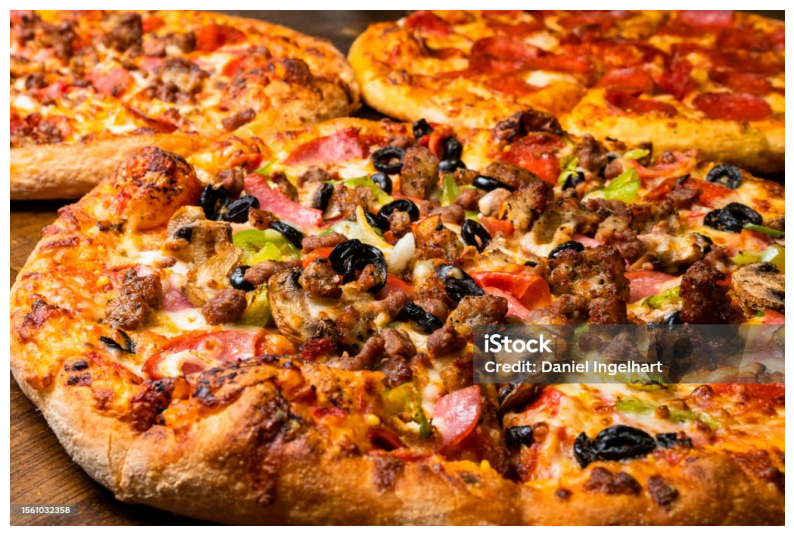

In [53]:
# View the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in HWC (height, width, color_channels) format not CHW (color_channels, height, width)
plt.axis(False);

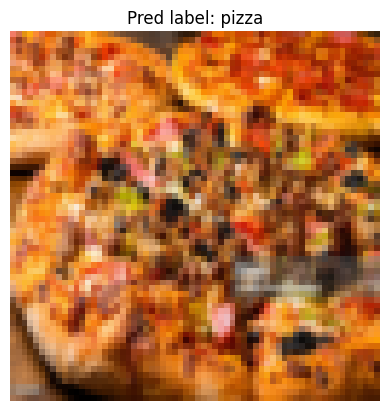

In [54]:
# Make a prediction on the image
model_4.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.

  # Resize image to 64x64
  resize = transforms.Resize((64, 64))
  img = resize(img)

  # Turn image in single batch and pass to target device
  batch = img.unsqueeze(0).to(device)

  # Predict on image
  y_pred_logit = model_4(batch)

  # Convert pred logit to pred label
  # pred_label = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
  pred_label = torch.argmax(y_pred_logit, dim=1) # get same results as above without torch.softmax

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False);